In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import sys
from pathlib import Path
# Add the project root (one level up from notebooks/) to Python path
sys.path.append(str(Path("../").resolve()))

In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt  
from src.config import DATA_PATH_2 # Import DATA_PATH_2 from config.py in the src/ folder

In [4]:
# load dataset
eda_loan_default = pd.read_csv(DATA_PATH_2)

In [5]:
eda_loan_default.describe()

Age         Income     LoanAmount    CreditScore  \
count  255347.000000  255347.000000  255347.000000  255347.000000   
mean       43.498306   82499.304597  127578.865512     574.264346   
std        14.990258   38963.013729   70840.706142     158.903867   
min        18.000000   15000.000000    5000.000000     300.000000   
25%        31.000000   48825.500000   66156.000000     437.000000   
50%        43.000000   82466.000000  127556.000000     574.000000   
75%        56.000000  116219.000000  188985.000000     712.000000   
max        69.000000  149999.000000  249999.000000     849.000000   

       MonthsEmployed  NumCreditLines   InterestRate       LoanTerm  \
count   255347.000000   255347.000000  255347.000000  255347.000000   
mean        59.541976        2.501036      13.492773      36.025894   
std         34.643376        1.117018       6.636443      16.969330   
min          0.000000        1.000000       2.000000      12.000000   
25%         30.000000        2.000000       7.770000      24.000000   
50%         60.000000        2.000000      13.460000      36.000000   
75%         90.000000        3.000000      19.250000      48.000000   
max        119.000000        4.000000      25.000000      60.000000   

            DTIRatio        Default  
count  255347.000000  255347.000000  
mean        0.500212       0.116128  
std         0.230917       0.320379  
min         0.100000       0.000000  
25%         0.300000       0.000000  
50%         0.500000       0.000000  
75%         0.700000       0.000000  
max         0.900000       1.000000

In [6]:
# Class distribution
class_counts = eda_loan_default['Default'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution: 0 = Non-Default, 1 = Default')
plt.ylabel('Number of Defaults')
for i, v in enumerate(class_counts.values):
    plt.text(i, v + 100, f"{v} ({v / class_counts.sum() * 100:.2f}%)", ha='center') # class distribution annotation
plt.show()

In [7]:
# Numerical features
numerical_features = eda_loan_default.select_dtypes(include=np.number)

# Skewness & Kurtosis
for col in numerical_features.columns:
    print(f"{col}: skew={numerical_features[col].skew():.2f}, kurtosis={numerical_features[col].kurtosis():.2f}")

Age: skew=0.00, kurtosis=-1.20
Income: skew=-0.00, kurtosis=-1.20
LoanAmount: skew=-0.00, kurtosis=-1.20
CreditScore: skew=0.00, kurtosis=-1.20
MonthsEmployed: skew=-0.00, kurtosis=-1.20
NumCreditLines: skew=-0.00, kurtosis=-1.36
InterestRate: skew=0.00, kurtosis=-1.20
LoanTerm: skew=-0.00, kurtosis=-1.30
DTIRatio: skew=-0.00, kurtosis=-1.20
Default: skew=2.40, kurtosis=3.74


In [8]:
# Correlation with target
correlation = numerical_features.corr()
print("\nCorrelation with Default:\n", correlation['Default'].sort_values(ascending=False))


Correlation with Default:
 Default           1.000000
InterestRate      0.131273
LoanAmount        0.086659
NumCreditLines    0.028330
DTIRatio          0.019236
LoanTerm          0.000545
CreditScore      -0.034166
MonthsEmployed   -0.097374
Income           -0.099119
Age              -0.167783
Name: Default, dtype: float64


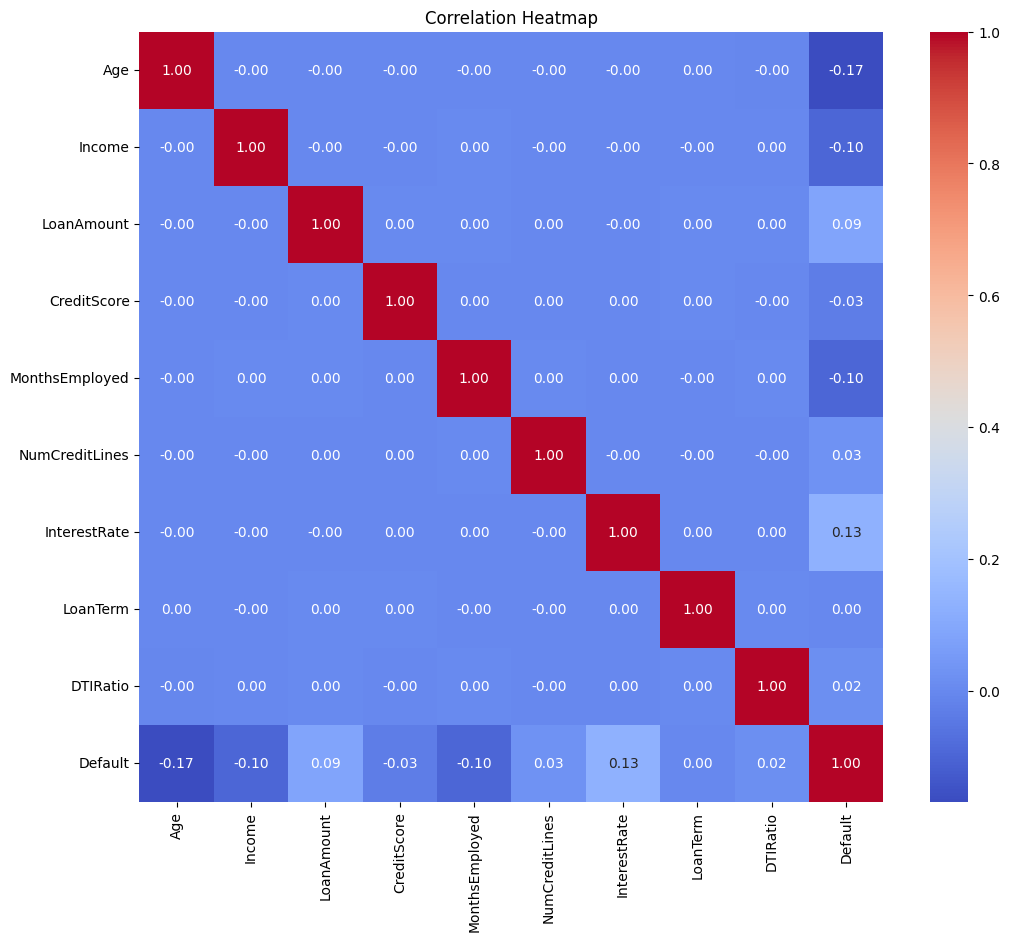

In [9]:
# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Dataset Imbalance 
The dataset is imbalanced, with approximately 88% non-defaults and 12% defaults.

## Distribution Analysis

The skewness results show that all numerical features are approximately symmetrically distributed.

The kurtosis values indicate that most features have fewer extreme outliers.

However, the target variable Default is right-skewed, which may be due to the class imbalance.

The kurtosis for the target variable suggests it is approximately normally distributed.

## Correlation with Target Variable

Among the numerical features, Age appears to have the strongest correlation with the target variable (Default).

In [10]:
def credit_bucket_custom(score):
    if score < 500:
        return "Poor"
    elif score < 650:
        return "Fair"
    elif score < 750:
        return "Good"
    else:
        return "Excellent"


In [11]:
# Create a new column with credit categories
eda_loan_default["CreditCategory"] = eda_loan_default["CreditScore"].apply(credit_bucket_custom)

In [12]:
# Count of customers by credit category
eda_loan_default["CreditCategory"].value_counts()


CreditCategory
Poor         93029
Fair         69737
Excellent    46574
Good         46007
Name: count, dtype: int64

In [13]:
# Distribution of Credit Categories
sns.countplot(x="CreditCategory", data=eda_loan_default)
plt.title("Distribution of Credit Categories")
plt.show()

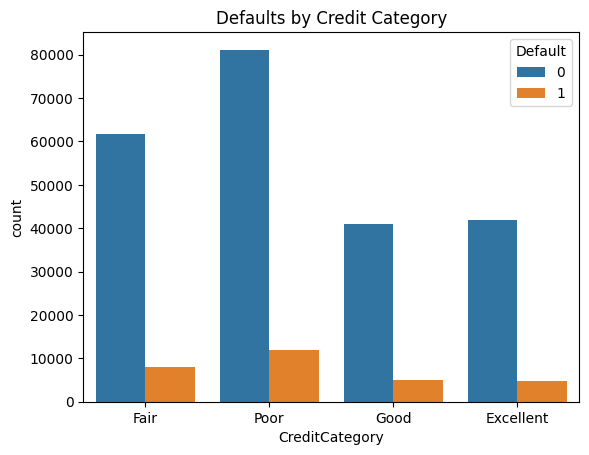

In [15]:
# Count of defaults by credit category
sns.countplot(x="CreditCategory", hue="Default", data=eda_loan_default)
plt.title("Defaults by Credit Category")
plt.savefig("CreditCategory.png", dpi=300, bbox_inches='tight')
plt.show()

Interestingly, the credit bucket visualization indicates that a higher proportion of defaults occurs among clients in the Poor credit category, while the fewest defaults are observed in the Excellent category. This suggests that clients with higher credit scores are less likely to default.